# <center>**Data Mining Assignment 4**</center><br>  
## <center>by Kweku E. Acquaye</center><br> 

This report uses modern data science methods to analyse data. It constitutes Assignment 4 in fulfilment of the requirements of Data Mining module.

**Declaration:** Some of the code used in this assignment has been adapted and customized from www.docs.python.org/, www.matplotlib.org/stable/, www.pandas.pydata.org/docs, www.stackoverflow.com/questions/, www.geeksforgeeks.org/, www.kite.com/python/, www.codegrepper.com/, www.machinelearningmind.com/, www.kaggle.com/, www.scikit-learn.org, www.towardsdatascience.com/, www.github.com/, www.skillcrush.com/ and Data Mining Lab, Tutorial and Lecture Notes.<br> 

**Part 1** 

**1a.**<br> 
The various tags present in the HTML code and their functions are:<br> 
1. **html** = defines the entirety of an HTML document.
2. **script** = defines portions of the document where other text or document types are inserted, e.g. javascript.
3. **head** = contains document metadata.
4. **body** = defines the rest of the document from the head or metadata.
5. **h1** = the most important heading, usually one per webpage, used for logos, page titles, and such like.
6. **p** = indicates a paragraph or block of text.
7. **table** = indicates insertion of a table.
8. **thead** = defines a box that groups table headings.
9. **tr** = indicates a table row.
10. **th** = indicates table heading, but unlike thead which groups headings, is a single heading element.
11. **tbody** = defines a table's body, i.e. the rest of the table other than the table headings.
12. **td** = indicates table cells, or table data.<br> 

**1b.**<br> 
Using the Beautiful Soup package to scrape the table at given website and converting it into a pandas dataframe:
 



In [ ]:
# Importing modules, packages and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

#from google.colab import data_table
#data_table.disable_dataframe_formatter()

print("Modules imported.")

Modules imported.


In [ ]:
# Accessing website
url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)
print("Website accessed.")

Website accessed.


Using Beautiful Soup (bs4) package the HTML content is parsed to Python API via lxml to create a Python object as follows:

In [ ]:
# Creating python object out of html content
soup = BeautifulSoup(html, 'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [ ]:
# Obtaining contents of all table rows
rows = soup.find_all('tr')
print(rows[:3])

[<tr><th title="Field #1">Region</th>
<th title="Field #2">Age</th>
<th title="Field #3">Income</th>
<th title="Field #4">Online Shopper</th>
</tr>, <tr>
<td>India</td>
<td align="right">49</td>
<td align="right">86400</td>
<td>No</td>
</tr>, <tr>
<td>Brazil</td>
<td align="right">32</td>
<td align="right">57600</td>
<td>Yes</td>
</tr>]


In [ ]:
# Converting table row contents into python lists
for row in rows:
    row_td = row.find_all('td')
    print(row_td)
type(row_td)

[]
[<td>India</td>, <td align="right">49</td>, <td align="right">86400</td>, <td>No</td>]
[<td>Brazil</td>, <td align="right">32</td>, <td align="right">57600</td>, <td>Yes</td>]
[<td>USA</td>, <td align="right">35</td>, <td align="right">64800</td>, <td>No</td>]
[<td>Brazil</td>, <td align="right">43</td>, <td align="right">73200</td>, <td>No</td>]
[<td>USA</td>, <td align="right">45</td>, <td align="right"></td>, <td>Yes</td>]
[<td>India</td>, <td align="right">40</td>, <td align="right">69600</td>, <td>Yes</td>]
[<td>Brazil</td>, <td align="right"></td>, <td align="right">62400</td>, <td>No</td>]
[<td>India</td>, <td align="right">53</td>, <td align="right">94800</td>, <td>Yes</td>]
[<td>USA</td>, <td align="right">55</td>, <td align="right">99600</td>, <td>No</td>]
[<td>India</td>, <td align="right">42</td>, <td align="right">80400</td>, <td>Yes</td>]


bs4.element.ResultSet

In [ ]:
# Removing html tags
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print("Cleaned lists are now in the form ", cleantext)

Cleaned lists are now in the form  [India, 42, 80400, Yes]


In [ ]:
# Creating empty list where table header will be stored
header_list = []

# Finding 'th' html tags
col_labels = soup.find_all('th')
col_str = str(col_labels)

# Extracting text without html tags
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()

# Adding clean table header to list
header_list.append(cleantext_header)

# Outputting resultant header list
print(header_list)

['[Region, Age, Income, Online Shopper]']


In [ ]:
# Creating empty list where table body will be stored
table_list = []

# For every row in the table, find each cell element and add it to a list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    # Extracting text without html tags
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()
    # Adding clean table rows to list 
    table_list.append(row_cleantext)  

# Outputting resultant table body list
table_list

['[]',
 '[India, 49, 86400, No]',
 '[Brazil, 32, 57600, Yes]',
 '[USA, 35, 64800, No]',
 '[Brazil, 43, 73200, No]',
 '[USA, 45, , Yes]',
 '[India, 40, 69600, Yes]',
 '[Brazil, , 62400, No]',
 '[India, 53, 94800, Yes]',
 '[USA, 55, 99600, No]',
 '[India, 42, 80400, Yes]']

In [ ]:
# Converting header list object into pandas dataframe
df_header = pd.DataFrame(header_list)
df_header

,0
0,"[Region, Age, Income, Online Shopper]"


In [ ]:
# Converting each header element into separate column from one-column df of all elements
df_header2 = df_header[0].str.split(',', expand=True)
df_header2

,0,1,2,3
0,[Region,Age,Income,Online Shopper]


In [ ]:
# Removing square brackets
try:
  df_header2[0] = df_header2[0].str.strip('[')
  df_header2[0] = df_header2[0].str.strip(']')
  df_header2[0] = df_header2[0].str.strip('* ]')
  df_header2[0] = df_header2[0].str.strip("' ']")
except:
  print(df_header2[0])

df_header2

,0,1,2,3
0,Region,Age,Income,Online Shopper]


In [ ]:
# Converting table body lists object into pandas dataframe
df_table = pd.DataFrame(table_list)
df_table

,0
0,[]
1,"[India, 49, 86400, No]"
2,"[Brazil, 32, 57600, Yes]"
3,"[USA, 35, 64800, No]"
4,"[Brazil, 43, 73200, No]"
5,"[USA, 45, , Yes]"
6,"[India, 40, 69600, Yes]"
7,"[Brazil, , 62400, No]"
8,"[India, 53, 94800, Yes]"
9,"[USA, 55, 99600, No]"


In [ ]:
# Converting array-like elements of df into separate columns from one-column df of all elements
df_table2 = df_table[0].str.split(',', expand=True)
df_table2

,0,1,2,3
0,[],None,None,None
1,[India,49,86400,No]
2,[Brazil,32,57600,Yes]
3,[USA,35,64800,No]
4,[Brazil,43,73200,No]
5,[USA,45,,Yes]
6,[India,40,69600,Yes]
7,[Brazil,,62400,No]
8,[India,53,94800,Yes]
9,[USA,55,99600,No]


In [ ]:
# Removing square brackets
try:
  df_table2[0] = df_table2[0].str.strip('[')
  df_table2[0] = df_table2[0].str.strip(']')
  df_table2[1] = df_table2[1].str.strip('[')
  df_table2[1] = df_table2[1].str.strip(']')
  df_table2[2] = df_table2[2].str.strip('[')
  df_table2[2] = df_table2[2].str.strip(']')
  df_table2[3] = df_table2[3].str.strip('[')
  df_table2[3] = df_table2[3].str.strip(']')
  df_table2[4] = df_table2[4].str.strip('[')
  df_table2[4] = df_table2[4].str.strip(']')
  df_table2[5] = df_table2[5].str.strip('[')
  df_table2[5] = df_table2[5].str.strip(']')
  df_table2[6] = df_table2[6].str.strip('[')
  df_table2[6] = df_table2[6].str.strip(']')
  df_table2[7] = df_table2[7].str.strip('[')
  df_table2[7] = df_table2[7].str.strip(']')
  df_table2[8] = df_table2[8].str.strip('[')
  df_table2[8] = df_table2[8].str.strip(']')
  df_table2[9] = df_table2[9].str.strip('[')
  df_table2[9] = df_table2[9].str.strip(']')
  df_table2[10] = df_table2[10].str.strip(']')
  df_table2[10] = df_table2[10].str.strip('[')
except:
  print(df_table2)

         0     1       2     3
0           None    None  None
1    India    49   86400    No
2   Brazil    32   57600   Yes
3      USA    35   64800    No
4   Brazil    43   73200    No
5      USA    45           Yes
6    India    40   69600   Yes
7   Brazil         62400    No
8    India    53   94800   Yes
9      USA    55   99600    No
10   India    42   80400   Yes


In [ ]:
# Concatenating dfs
frames = [df_header2, df_table2]
df = pd.concat(frames)

# Assigning first row to be df header
df2 = df.rename(columns=df.iloc[0])

# Dropping replicated header from first row of df
df3 = df2.drop(df2.index[0])
df3

,Region,Age,Income,Online Shopper]
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


In [ ]:
# Removing ']' from column name 
df3.rename(columns={"Online Shopper]": "Online_Shopper"})

,Region,Age,Income,Online Shopper]
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


**2.**<br> 
Performing web scraping on the table in the given website and converting it into a pandas dataframe:

In [ ]:
# Accessing website
url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
html = urlopen(url)
print("Website accessed.")

Website accessed.


Using Beautiful Soup (bs4) package, the HTML content is parsed to Python API via lxml to create a Python object as follows:

In [ ]:
# Creating python object out of html content
soup = BeautifulSoup(html, 'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [ ]:
# Obtaining contents of all table rows
rows = soup.find_all('tr')
print(rows[:3])

[<tr><th scope="col">Postgraduate degree programmes</th><th scope="col">Part-time<br/>(2 year)</th><th scope="col">Full-time<br/>(1 year)</th></tr>, <tr>
<td><span>Advanced Electronic and Electrical Engineering</span></td>
<td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60C</a></td>
<td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60A</a></td>
</tr>, <tr>
<td>Artificial Intelligence</td>
<td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/" title="Use alt + click to follow the link">I4U2</a> </td>
<td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/arti

In [ ]:
# Converting table row contents into python lists
for row in rows:
    row_td = row.find_all('td')
    print(row_td)
type(row_td)

[]
[<td><span>Advanced Electronic and Electrical Engineering</span></td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60C</a></td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60A</a></td>]
[<td>Artificial Intelligence</td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/" title="Use alt + click to follow the link">I4U2</a> </td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/" title="Use alt + click to follow the link">I4U1</a> </td>]
[<td><span>Big Data Science</span></td>, <td style="text-align: center;

bs4.element.ResultSet

In [ ]:
# Removing html tags
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print("Cleaned lists are now in the form ", cleantext)

Cleaned lists are now in the form  [Digital and Technology Solutions (Apprenticeship), I4DA,  ]


In [ ]:
# Creating empty list where table header will be stored
header_list = []

# Finding 'th' html tags
col_labels = soup.find_all('th')
col_str = str(col_labels)

# Extracting text without html tags
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()

# Adding clean table header to list
header_list.append(cleantext_header)

# Outputting resultant header list
print(header_list)

['[Postgraduate degree programmes, Part-time(2 year), Full-time(1 year)]']


In [ ]:
# Creating empty list where table body will be stored
table_list = []

# For every row in the table, find each cell element and add it to a list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    # Extracting text without html tags
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()
    # Adding clean table rows to list 
    table_list.append(row_cleantext)  

# Outputting resultant table body list
table_list

['[]',
 '[Advanced Electronic and Electrical Engineering, H60C, H60A]',
 '[Artificial Intelligence, I4U2\xa0, I4U1\xa0]',
 '[Big Data Science, H6J6, H6J7]',
 '[Computer Games, \xa0, I4U4]',
 '[Computer Science, G4U2, G4U1]',
 '[Computer Science by Research, G4Q2, G4Q1]',
 '[Computing and Information Systems, G5U6, G5U5]',
 '[Data Science and Artificial Intelligence by Conversion, \xa0, I4U5\xa0]',
 '[Electronic Engineering by Research, H6T6, H6T5]',
 '[Internet of Things (Data), I1T2, I1T0]',
 '[Machine Learning for Visual Data Analytics, H6JZ, H6JE]',
 '[Sound and Music Computing\xa0, H6T4, H6T8]',
 '[Telecommunication and Wireless Systems, H6JD, H6JA]',
 '[Digital and Technology Solutions (Apprenticeship), I4DA, \xa0]']

In [ ]:
# Converting header list object into pandas dataframe
df_header = pd.DataFrame(header_list)
df_header

,0
0,"[Postgraduate degree programmes, Part-time(2 y..."


In [ ]:
# Converting each header element into separate column from one-column df of all elements
df_header2 = df_header[0].str.split(',', expand=True)
df_header2

,0,1,2
0,[Postgraduate degree programmes,Part-time(2 year),Full-time(1 year)]


In [ ]:
# Removing square brackets
try:
  df_header2[0] = df_header2[0].str.strip('[')
  df_header2[0] = df_header2[0].str.strip(']')
  df_header2[0] = df_header2[0].str.strip('* ]')
  df_header2[0] = df_header2[0].str.strip("' ']")
except:
  print(df_header2[0])

df_header2

,0,1,2
0,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year)]


In [ ]:
# Converting table body lists object into pandas dataframe
df_table = pd.DataFrame(table_list)
df_table

,0
0,[]
1,[Advanced Electronic and Electrical Engineerin...
2,"[Artificial Intelligence, I4U2 , I4U1 ]"
3,"[Big Data Science, H6J6, H6J7]"
4,"[Computer Games, , I4U4]"
5,"[Computer Science, G4U2, G4U1]"
6,"[Computer Science by Research, G4Q2, G4Q1]"
7,"[Computing and Information Systems, G5U6, G5U5]"
8,[Data Science and Artificial Intelligence by C...
9,"[Electronic Engineering by Research, H6T6, H6T5]"


In [ ]:
# Converting array-like elements of df into separate columns from one-column df of all elements
df_table2 = df_table[0].str.split(',', expand=True)
df_table2

,0,1,2
0,[],None,None
1,[Advanced Electronic and Electrical Engineering,H60C,H60A]
2,[Artificial Intelligence,I4U2,I4U1 ]
3,[Big Data Science,H6J6,H6J7]
4,[Computer Games,,I4U4]
5,[Computer Science,G4U2,G4U1]
6,[Computer Science by Research,G4Q2,G4Q1]
7,[Computing and Information Systems,G5U6,G5U5]
8,[Data Science and Artificial Intelligence by C...,,I4U5 ]
9,[Electronic Engineering by Research,H6T6,H6T5]


In [ ]:
# Removing square brackets
try:
  df_table2[0] = df_table2[0].str.strip('[')
  df_table2[0] = df_table2[0].str.strip(']')
  df_table2[1] = df_table2[1].str.strip('[')
  df_table2[1] = df_table2[1].str.strip(']')
  df_table2[2] = df_table2[2].str.strip('[')
  df_table2[2] = df_table2[2].str.strip(']')
  df_table2[3] = df_table2[3].str.strip('[')
  df_table2[3] = df_table2[3].str.strip(']')
  df_table2[4] = df_table2[4].str.strip('[')
  df_table2[4] = df_table2[4].str.strip(']')
  df_table2[5] = df_table2[5].str.strip('[')
  df_table2[5] = df_table2[5].str.strip(']')
  df_table2[6] = df_table2[6].str.strip('[')
  df_table2[6] = df_table2[6].str.strip(']')
  df_table2[7] = df_table2[7].str.strip('[')
  df_table2[7] = df_table2[7].str.strip(']')
  df_table2[8] = df_table2[8].str.strip('[')
  df_table2[8] = df_table2[8].str.strip(']')
  df_table2[9] = df_table2[9].str.strip('[')
  df_table2[9] = df_table2[9].str.strip(']')
  df_table2[10] = df_table2[10].str.strip(']')
  df_table2[10] = df_table2[10].str.strip('[')
  df_table2[11] = df_table2[11].str.strip(']')
  df_table2[11] = df_table2[11].str.strip('[')
  df_table2[12] = df_table2[12].str.strip(']')
  df_table2[12] = df_table2[12].str.strip('[')
  df_table2[13] = df_table2[13].str.strip(']')
  df_table2[13] = df_table2[13].str.strip('[')
  df_table2[14] = df_table2[14].str.strip(']')
  df_table2[14] = df_table2[14].str.strip('[')
except:
  print(df_table2)

                                                    0       1       2
0                                                        None    None
1      Advanced Electronic and Electrical Engineering    H60C    H60A
2                             Artificial Intelligence   I4U2    I4U1 
3                                    Big Data Science    H6J6    H6J7
4                                      Computer Games            I4U4
5                                    Computer Science    G4U2    G4U1
6                        Computer Science by Research    G4Q2    G4Q1
7                   Computing and Information Systems    G5U6    G5U5
8   Data Science and Artificial Intelligence by Co...           I4U5 
9                  Electronic Engineering by Research    H6T6    H6T5
10                          Internet of Things (Data)    I1T2    I1T0
11         Machine Learning for Visual Data Analytics    H6JZ    H6JE
12                         Sound and Music Computing     H6T4    H6T8
13             Telec

In [ ]:
# Concatenating dfs
frames = [df_header2, df_table2]
df = pd.concat(frames)

# Assigning first row to be df header
df2 = df.rename(columns=df.iloc[0])

# Dropping replicated header from first row of df
df3 = df2.drop(df2.index[0])
df3

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year)]
1,Advanced Electronic and Electrical Engineering,H60C,H60A
2,Artificial Intelligence,I4U2,I4U1
3,Big Data Science,H6J6,H6J7
4,Computer Games,,I4U4
5,Computer Science,G4U2,G4U1
6,Computer Science by Research,G4Q2,G4Q1
7,Computing and Information Systems,G5U6,G5U5
8,Data Science and Artificial Intelligence by Co...,,I4U5
9,Electronic Engineering by Research,H6T6,H6T5
10,Internet of Things (Data),I1T2,I1T0


To obtain the requisite 4th and 5th columns, i.e. URLs for part-time study programme details, and URLs for full-time study programme details respectively, the following list is created for later use: 

In [ ]:
# Creating empty list where link table body will be stored
link_table_list = []

# For every row in the link table, find each cell element and add it to a list
for row in rows:
    link_row_td = row.find_all('td')
    link_row_cells = str(link_row_td)
    link_table_list.append(link_row_cells)  

# Outputting resultant link table body list
link_table_list

['[]',
 '[<td><span>Advanced Electronic and Electrical Engineering</span></td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60C</a></td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60A</a></td>]',
 '[<td>Artificial Intelligence</td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/" title="Use alt + click to follow the link">I4U2</a>\xa0</td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/" title="Use alt + click to follow the link">I4U1</a>\xa0</td>]',
 '[<td><span>Big Data Science</span></td>, <td style=

In [ ]:
# Converting link table body lists object into pandas dataframe
link_df_table = pd.DataFrame(link_table_list)
print(link_df_table)

                                                    0
0                                                  []
1   [<td><span>Advanced Electronic and Electrical ...
2   [<td>Artificial Intelligence</td>, <td style="...
3   [<td><span>Big Data Science</span></td>, <td s...
4   [<td>Computer Games</td>, <td style="text-alig...
5   [<td><span>Computer Science</span></td>, <td s...
6   [<td><span>Computer Science by Research</span>...
7   [<td><span>Computing and Information Systems</...
8   [<td><span>Data Science and Artificial Intelli...
9   [<td><span>Electronic Engineering by Research<...
10  [<td><span>Internet of Things (Data)<br/></spa...
11  [<td><span>Machine Learning for Visual Data An...
12  [<td><span>Sound and Music Computing</span> </...
13  [<td><span>Telecommunication and Wireless Syst...
14  [<td><span>Digital and Technology Solutions (A...


In [ ]:
# Converting array-like elements of link df into separate columns from one-column df of all elements
link_df_table2 = link_df_table[0].str.split(',', expand=True)
link_df_table2

,0,1,2
0,[],None,None
1,[<td><span>Advanced Electronic and Electrical ...,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
2,[<td>Artificial Intelligence</td>,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
3,[<td><span>Big Data Science</span></td>,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
4,[<td>Computer Games</td>,"<td style=""text-align: center;""> </td>","<td style=""text-align: center;""><a href=""http..."
5,[<td><span>Computer Science</span></td>,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
6,[<td><span>Computer Science by Research</span>...,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
7,[<td><span>Computing and Information Systems</...,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
8,[<td><span>Data Science and Artificial Intelli...,"<td style=""text-align: center;""> </td>","<td style=""text-align: center;""><a href=""http..."
9,[<td><span>Electronic Engineering by Research<...,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."


In [ ]:
#df.drop(['B', 'C'], axis=1)
link_df_table3 = link_df_table2.drop([0], axis=1)
link_df_table3

,1,2
0,None,None
1,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
2,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
3,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
4,"<td style=""text-align: center;""> </td>","<td style=""text-align: center;""><a href=""http..."
5,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
6,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
7,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
8,"<td style=""text-align: center;""> </td>","<td style=""text-align: center;""><a href=""http..."
9,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."


In [ ]:
# Creating link table column names
link_df_table3.columns = ['part_time_programme_details_link', 'full_time_programme_details_link']

# Removing empty first row
link_df_table3 = link_df_table3.drop([0], axis=0)
link_df_table3

,part_time_programme_details_link,full_time_programme_details_link
1,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
2,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
3,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
4,"<td style=""text-align: center;""> </td>","<td style=""text-align: center;""><a href=""http..."
5,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
6,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
7,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
8,"<td style=""text-align: center;""> </td>","<td style=""text-align: center;""><a href=""http..."
9,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."
10,"<td style=""text-align: center;""><a href=""http...","<td style=""text-align: center;""><a href=""http..."


In [ ]:
type(link_df_table3)

pandas.core.frame.DataFrame

In [ ]:
# Attempting to clean link table
link_df_table3 = link_df_table3.apply(lambda x: x.str.strip('<td') if x.dtype == "object" else x)
link_df_table3 = link_df_table3.apply(lambda x: x.str.strip(' ') if x.dtype == "object" else x)
link_df_table3 = link_df_table3.apply(lambda x: x.str.strip('style="text-align:') if x.dtype == "object" else x)
link_df_table3 = link_df_table3.apply(lambda x: x.str.strip(' ') if x.dtype == "object" else x)
link_df_table3 = link_df_table3.apply(lambda x: x.str.strip('center;"><a') if x.dtype == "object" else x)
link_df_table3 = link_df_table3.apply(lambda x: x.str.strip(' ') if x.dtype == "object" else x)
link_df_table3 = link_df_table3.apply(lambda x: x.str.strip('href=') if x.dtype == "object" else x)
#link_df_table3 = link_df_table3.apply(lambda x: x.str.strip('>') if x.dtype == "object" else x)
link_df_table3

,part_time_programme_details_link,full_time_programme_details_link
1,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
2,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
3,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
4,</,"""https://www.qmul.ac.uk/postgraduate/taught/co..."
5,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
6,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
7,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
8,</,"""https://www.qmul.ac.uk/postgraduate/taught/co..."
9,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
10,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."


In [ ]:
# Concatenating columnwise
final_df = pd.concat([df3, link_df_table3], axis=1, join='inner')
final_df

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year)],part_time_programme_details_link,full_time_programme_details_link
1,Advanced Electronic and Electrical Engineering,H60C,H60A,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
2,Artificial Intelligence,I4U2,I4U1,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
3,Big Data Science,H6J6,H6J7,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
4,Computer Games,,I4U4,</,"""https://www.qmul.ac.uk/postgraduate/taught/co..."
5,Computer Science,G4U2,G4U1,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
6,Computer Science by Research,G4Q2,G4Q1,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
7,Computing and Information Systems,G5U6,G5U5,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
8,Data Science and Artificial Intelligence by Co...,,I4U5,</,"""https://www.qmul.ac.uk/postgraduate/taught/co..."
9,Electronic Engineering by Research,H6T6,H6T5,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."
10,Internet of Things (Data),I1T2,I1T0,"""https://www.qmul.ac.uk/postgraduate/taught/co...","""https://www.qmul.ac.uk/postgraduate/taught/co..."


**3.**<br> 
**a.**<br>
In the random walk model graph<br> 
<div>
<img src= "https://drive.google.com/uc?id=1WQ_wFrKc2Yp1Lu4VU5lsKz4jgDMYTLhJ" alt= "Lab08 random walk model graph" width=500/>
</div>



the **hubs** are nodes **3, 4 and 5** and the **authorities** are nodes **1 and 2**.<br> 

**b.**<br> 
Adding transitions with a uniform probability distribution in the case of dead-end nodes to the graph:<br> 
<div>
<img src= "https://drive.google.com/uc?id=1yoGAjza6CiQRjkj91PJqHWq-yoQpVbSJ" alt= "Lab08 random walk model graph" width=900/>
</div>

**c.**<br> 
Calculating the transition probabilities $p_{ji}$ for all 5 nodes in the graph (where $i$ and $j$ take values between 1 to 5) using the formula:<br> 
<div>
<img src= "https://drive.google.com/uc?id=1uJ6DkKvV8ZXZfwmEV1TQ-XRKvpfJml7e" alt= "Lab08 RWM transition probability formula" width=600/>
</div><br> 

**i.** For node 1,<br> 
$\pi$(1) = $\alpha$/5 **+** (1 - $\alpha$) **x** ($\pi$(1) / 5 **+** $\pi$(2) / 5 **+** $\pi$(3) / 2 **+** $\pi$(4) / 2 **+** $\pi$(5) / 2)<br> 

**ii.** For node 2,<br> 
$\pi$(2) = $\alpha$/5 **+** (1 - $\alpha$) **x** ($\pi$(1) / 5 **+** $\pi$(2) / 5 **+** $\pi$(3) / 2 **+** $\pi$(4) / 2 **+** $\pi$(5) / 2)<br> 

**iii.** For node 3,<br> 
$\pi$(3) = $\alpha$/5 **+** (1 - $\alpha$) **x** ($\pi$(1) / 5 **+** $\pi$(2) / 5)<br> 

**iv.** For node 4,<br> 
$\pi$(4) = $\alpha$/5 **+** (1 - $\alpha$) **x** ($\pi$(1) / 5 **+** $\pi$(2) / 5)<br> 

**v.** For node 5,<br> 
$\pi$(5) = $\alpha$/5 **+** (1 - $\alpha$) **x** ($\pi$(1) / 5 **+** $\pi$(2) / 5)<br> 



**Part 2**<br> 
**1.**<br> 
**a.**<br> 
A constructed document-term matrix (vector space representation) for the given documents is:<br> 
<div>
<img src= "https://drive.google.com/uc?id=1Vw_P5pBoawAp5iN2aSRmZsZ4lLmPzgTC" alt= "Lab08 random walk model graph" width=900/>
</div>


The stop words removed and the reasons for their removal are:

i. refers = common verb.<br> 
ii. to = preposition.<br> 
iii. that = pronoun.<br> 
iv. are = auxiliary verb.<br> 
v. through = preposition.<br> 
vi. a = article.<br> 
vii. can = common verb.<br> 
viii. be = common verb.<br> 
ix. as = conjunction.<br> 
x. of = preposition.<br> 
xi. by = preposition.<br> 
xii. an = article.<br> 
xiii. is = auxiliary verb.<br> 
xiv. or = conjunction.<br> 
xv. number = preposition.<br> 

The following verbs were not removed because they were considered not common but relevant in the context of the subject matter being analysed:<br> 

#### <center> _collect, view,_ and _describe._ </center><br> 

On reflection, _"data"_ was considered to be distinct from _"dataset"_ (and nearer or similar to "object" in the context used), so these two (data and dataset) were not merged.



**b.**<br> 
The inverse document frequency $\mathit{idf}(w)$ is the logarithm of the fraction of the total number of documents divided by the number of documents that contain word $w$, and is obtained by the formula:<br> 
<div>
<img src= "https://drive.google.com/uc?id=16oUUroVmW9SYCN7wIRGnc9ePtCyJrVk3" alt= "Lab08 random walk model graph" width=500/>
</div><br> 

Using the above constructed document-term matrix, the inverse document frequency $\mathit{idf}(w)$ for all identified words $w$ are:<br>  

i.<br> 
$\mathit{idf}(data)$ = log$_{10}$(4/2) = log$_{10}$ 2 = **0.30**<br> 

ii.<br> 
$\mathit{idf}(characteristic)$ = log$_{10}$(4/2) = log$_{10}$ 2 = **0.30**<br> 

iii.<br> 
$\mathit{idf}(collect)$ = log$_{10}$(4/2) = log$_{10}$ 2 = **0.30**<br> 

iv.<br> 
$\mathit{idf}(observation)$ = log$_{10}$(4/1) = log$_{10}$ 4 = **0.60**<br> 

v.<br> 
$\mathit{idf}(dataset)$ = log$_{10}$(4/1) = log$_{10}$ 4 = **0.60**<br> 

vi.<br> 
$\mathit{idf}(view)$ = log$_{10}$(4/1) = log$_{10}$ 4 = **0.60**<br> 

vii.<br> 
$\mathit{idf}(object)$ = log$_{10}$(4/3) = log$_{10}$ 4 = **0.12**<br> 

viii.<br> 
$\mathit{idf}(describe)$ = log$_{10}$(4/1) = log$_{10}$ 4 = **0.60**<br> 

ix.<br> 
$\mathit{idf}(attribute)$ = log$_{10}$(4/2) = log$_{10}$ 2 = **0.30**<br> 

x.<br> 
$\mathit{idf}(feature)$ = log$_{10}$(4/1) = log$_{10}$ 4 = **0.60**<br> 

**2.**<br> 
Given timeseries $y = \{0.1, 0.15, 0.2, 0.2, 0.3, 0.4, 0.25, 0.6, 0.5\}$, performing timeseries binning using $k=3$ values per bin gives:<br> 

i.<br> 
Bin 1 = (0.1 + 0.15 + 0.2) / 3 = 0.45 / 3 = 0.15<br> 

ii.<br> 
Bin 2 = (0.2 + 0.3 + 0.4) / 3 = 0.9 / 3 = 0.30<br> 

iii.<br> 
Bin 3 = (0.25 + 0.6 + 0.5) / 3 = 1.35 / 3 = 0.45<br> 

Therefore timeseries binning using $k=3$ is = **y'$_{i + 1}$ = {0.15, 0.30, 0.45}**.<br> 

**3.**<br> 
**Mining Timeseries Data - Discrete Fourier Transform (DFT)**<br> 
DFT is able to decompose a given timeseries into a linear combination of sinusoids, and  is one of the fundamental tools used in the field of signal processing and is useful across numerous applications.



In [ ]:
# Importing modules
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
print("Modules imported.")

Modules imported.


   0.000000000000000000e+00
0                  0.049068
1                  0.098017
2                  0.146730
3                  0.195090
4                  0.242980

Visualising original timeseries: 



Text(0.5, 0, 'Time')

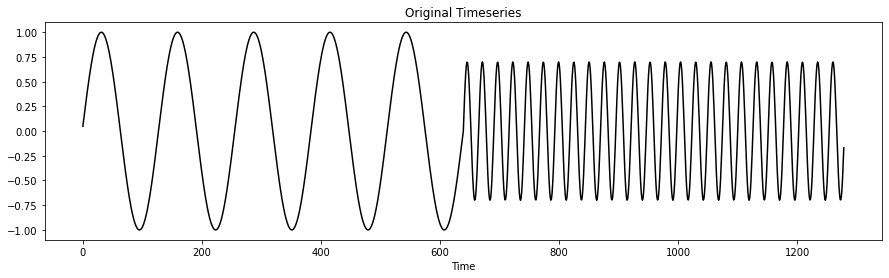

In [ ]:
# Loading data
series = pd.read_csv('timeseries.csv', header=0)

# Previewing data
print(series.head())

# Visualising original series
print("\nVisualising original timeseries: \n")

plt.figure(figsize=(15, 4))
plt.title('Original Timeseries')
plt.plot(series, 'k')
plt.xlabel('Time')

In [ ]:
# Converting to numpy array
series_array = np.array(series)
print(series_array)

[[ 0.04906767]
 [ 0.09801714]
 [ 0.14673047]
 ...
 [-0.47009127]
 [-0.32997772]
 [-0.17008613]]


In [ ]:
# Converting to 1-d array
series_array.flatten()

array([ 0.04906767,  0.09801714,  0.14673047, ..., -0.47009127,
       -0.32997772, -0.17008613])

 Computing the Discrete Fourier Transform (DFT) of loaded timeseries:

A display for the magnitude of the derived DFT is: 



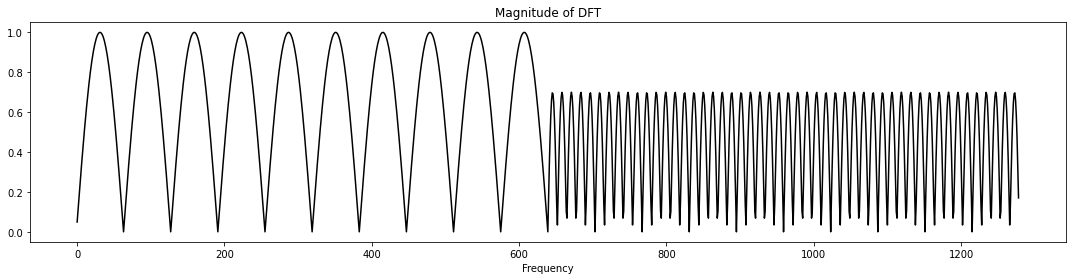

In [ ]:
# Implementing python Fast Fourier Transform (FFT) for DFT
Xfft = np.fft.fft(series_array)

# Visualising DFT
print("A display for the magnitude of the derived DFT is: \n")

plt.figure(figsize=(15, 4))
plt.title('Magnitude of DFT')
plt.plot(np.abs(Xfft), 'k')
plt.xlabel('Frequency')
plt.tight_layout()

The number of predominant frequency components is 10.<br> 

**4.**<br> 
**Mining Timeseries Data - Smoothing**<br> 
_Moving averages_ are a simple and common type of smoothing used in timeseries analysis and timeseries forecasting.

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
1959-01-06      29
1959-01-07      45
1959-01-08      43
1959-01-09      38
1959-01-10      27


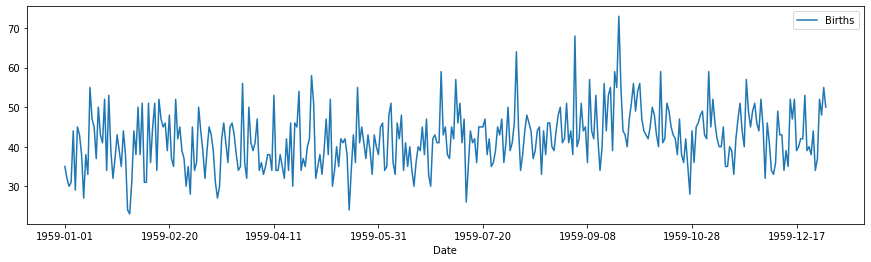

In [ ]:
# Loading births data
births_data = read_csv('births.csv', header=0, index_col=0)

# Previewing data
print(births_data.head(10))

# Visualising data
births_data.plot(figsize=(15,4))

A window size that corresponds to one week = 7 days = $\{t-6, t-5, t-4, t-3,  t-2, t-1, t\}$

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03        NaN
1959-01-04        NaN
1959-01-05        NaN
1959-01-06        NaN
1959-01-07  35.142857
1959-01-08  36.285714
1959-01-09  37.142857
1959-01-10  36.714286


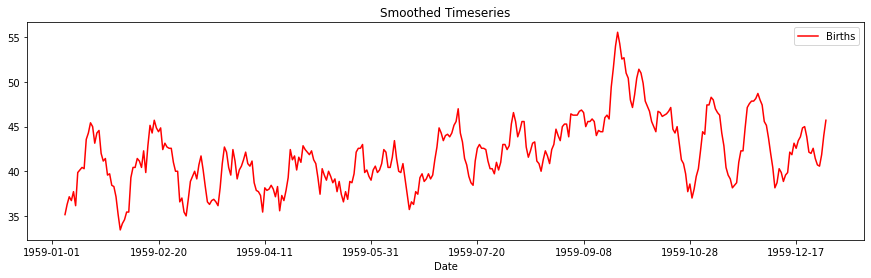

In [ ]:
# Performing trailing moving average smoothing 
rolling = births_data.rolling(window=7, min_periods=7) 
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

# Visualising transformed dataset
rolling_mean.plot(color='red', figsize=(15,4),title='Smoothed Timeseries')

In [ ]:
# Counting NaNs
rolling_mean['Births'].isnull().sum()

6

In [ ]:
# Replacing NaNs with zero
rolling_mean['Births'] = rolling_mean['Births'].fillna(0)

# Checking replacement
rolling_mean.head(8)

,Births
Date,
1959-01-01,0.000000
1959-01-02,0.000000
1959-01-03,0.000000
1959-01-04,0.000000
1959-01-05,0.000000
1959-01-06,0.000000
1959-01-07,35.142857
1959-01-08,36.285714


**Forecasting**<br> 
Timeseries analysis enables _**forecasting**_ - making predictions about data points in the future.
Using the above smoothed dataset to forecast daily births for the first 5 days of 1960 using _Autoregressive_ (**AR**) _model_ with $p=2$:

In [ ]:
# Installing library
!pip install statsmodels --upgrade

# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
print("Modules imported.")

Modules imported.


In [ ]:
# Modelling AR
model = AutoReg(rolling_mean, lags=7, old_names=False)
model_fit = model.fit()

# Forecasting 5 days
yhat = model_fit.predict(len(rolling_mean), len(rolling_mean) + 4)
print("From the 1959 timeseries data, the AR model predicts the daily female births in California for the first 5 days of 1960 as:\n", yhat)

From the 1959 timeseries data, the AR model predicts the daily female births in California for the first 5 days of 1960 as:
 1960-01-01    45.577923
1960-01-02    45.394832
1960-01-03    45.190943
1960-01-04    45.063965
1960-01-05    44.959645
Freq: D, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


AR model predicted birth numbers for the first 5 days are 46, 45, 45, 45, and 44 resppectively.<br> 
<br> 

Using _Autoregressive Moving Average_ (**ARMA**) _model_ with $p=2$ and $q=2$:

In [ ]:
# Importing dependencies
from statsmodels.tsa.arima.model import ARIMA
from random import random

# Modelling ARMA
model = ARIMA(rolling_mean, order=(2, 0, 2))
model_fit = model.fit()

# Forecasting 5 days
yhat2 = model_fit.predict(len(rolling_mean), len(rolling_mean) + 4)
print("From the 1959 timeseries data, the ARMA model predicts the daily female births in California for the first 5 days of 1960 as:\n", yhat2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


From the 1959 timeseries data, the ARMA model predicts the daily female births in California for the first 5 days of 1960 as:
 1960-01-01    45.810249
1960-01-02    45.818768
1960-01-03    45.728095
1960-01-04    45.564020
1960-01-05    45.347310
Freq: D, Name: predicted_mean, dtype: float64


ARMA model predicted birth numbers for the first 5 days are 46, 46, 46, 46, and 45 resppectively.<br> 
<br> 

**5.**<br> 
**Text Mining**<br> 
The next few steps perform document clustering using k-means on wikipedia articles:

In [ ]:
# Installing library
!pip install wikipedia

# Importing library
import wikipedia

# Creating lists
articles=['anomaly detection','cluster analysis','k-means clustering','data mining','data warehouse','association rule learning']
wiki_lst=[]
title=[]

# Loading wikipedia articles
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article,auto_suggest=False).content)
   title.append(article)

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=29bcdb169122bfef5a7bd2f45375dce878430f498f700fb931820bbff35c0cd4
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
loading content:  anomaly detection
loading content:  cluster analysis
loading content:  k-means clustering
loading content:  data mining
loading content:  data warehouse
loading content:  association rule learning


Representing articles using a vector space representation:

In [ ]:
# Importinglibrary
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating tf-idf feature of the wikipedia dataset
vectorizer = TfidfVectorizer(stop_words={',', '.', 'for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'since', 'when', 'until', 
                                         'I', 'we', 'you', 'he', 'she', 'it', 'his', 'hers', 'they', 'this', 'these', 'that', 'those', 
                                          'who', 'which', 'what', 'that', 'as', 'each', 'all', 'everyone', 'either', 'both', 'any', 'such',
                                          'above', 'across', 'against', 'along', 'among', 'around', 'at', 'before', 'behind', 'below', 
                                          'beneath', 'beside', 'between', 'by', 'down', 'from', 'in', 'into', 'near', 'of', 'off', 'on', 
                                          'to', 'toward', 'under', 'upon', 'with'})
X = vectorizer.fit_transform(wiki_lst)

print(X.shape)

(6, 3468)


Using the elbow method to estimate appropriate number of clusters:

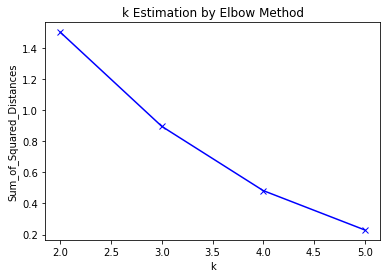

In [ ]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculating sum of squared distances
Sum_of_squared_distances = []
K = range(2,6)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

# Visualising elbow plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Squared_Distances')
plt.title('k Estimation by Elbow Method')
plt.show()

The first dent in the plot is at k = 3, hence this is chosen.

In [ ]:
# Fitting k-means model with k=3
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Printing list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                       title  cluster
1           cluster analysis        0
2         k-means clustering        0
5  association rule learning        0
0          anomaly detection        1
3                data mining        2
4             data warehouse        2


It is observed from the k-means clustering results that there is one cluster comprising cluster analysis, k-means clustering and association rule learning, another cluster comprising data mining and data warehouse, with anomaly detection forming a cluster on its own. These results can be described as fairly good because data mining and data warehouse, which form one cluster, are related and would therefore share many terms. So also would cluster analysis and k-means clustering in another cluster, and although the last member of that cluster - association rule learning - may at first glance seem lees related, it is however a method of grouping related itemsets and hence a form of clustering. It is thus in the correct cluster. Anomaly detection in a cluster of its own seems appropriate.